# EDA preliminar Google Maps

## Importamos las librerias a utilizar

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import ydata_profiling

Agregamos algunas funciones para utilzarlas más adelante

In [5]:
def PorcentajeNulos(df):
    """
    Devuelve un resumen del número de registros por columna en un marco de datos, y
    el porcentaje de valores nulos de cada una. También devuelve
    devuelve el tipo de datos de cada columna.

    Argumentos:
    df (pandas dataframe): Marco de datos a analizar

    """
    tipos = df.dtypes

    df_nulos = pd.DataFrame(tipos, columns=['Data_Types'])
    df_nulos['%_Null'] = round(df.isnull().sum() / len(df) * 100,2)
    df_nulos['Qty_Null'] = round(df.isnull().sum(),2)
    df_nulos['Qty_No_Null'] = round(df.count(),2)
    df_nulos['Total_Registros'] = len(df)

    return df_nulos

## Análisis preliminar Sitios

### Importamos los datos de BigQuery

In [2]:
from google.colab import auth
auth.authenticate_user()

# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Sitios Restaurant Filtrado'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_sitios = client.query(sql_query).to_dataframe()

In [3]:
df_sitios.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,Restaurant,4.0,8,None,None,"b'{""Service options"":[""Delivery""],""Amenities"":...",None,"b'[""0x89c6c62a40f4b733:0x73bfeec1898f272b"",""0x...",https://www.google.com/maps/place//data=!4m2!3...
1,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,None,26.641377,-81.940545,Restaurant,5.0,1,$$,None,"b'{""Service options"":[""Dine-in"",""Delivery""],""A...",None,None,https://www.google.com/maps/place//data=!4m2!3...
2,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,None,43.643365,-70.272457,Restaurant,2.8,17,None,None,"b'{""Service options"":[""Delivery""],""Amenities"":...",None,"b'[""0x4cb29ebe47f077a9:0x7d8d73a3a52a763b""]'",https://www.google.com/maps/place//data=!4m2!3...


### Valores nulos y tipos de dato

In [6]:
PorcentajeNulos(df_sitios)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
name,object,0.00,0,212014,212014
address,object,0.50,1058,210956,212014
gmap_id,object,0.00,0,212014,212014
description,object,65.86,139622,72392,212014
latitude,float64,0.00,0,212014,212014
longitude,float64,0.00,0,212014,212014
category,object,0.00,0,212014,212014
avg_rating,float64,0.00,0,212014,212014
num_of_reviews,Int64,0.00,0,212014,212014
price,object,52.83,112014,100000,212014


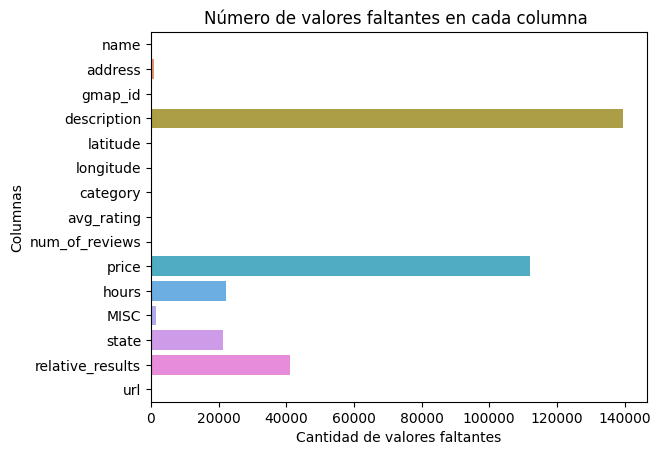

In [7]:
nulos = df_sitios.isnull().sum()
sns.barplot( y = nulos.index, x = nulos.values, orient = 'h')
plt.title('Número de valores faltantes en cada columna ')
plt.ylabel('Columnas')
plt.xlabel('Cantidad de valores faltantes')
plt.show()

Hay un 65.86% de valores nulos en el campo de descripción, por ser una columna que no aporta información, se eliminará.

In [11]:
df_sitios.drop(columns= 'description', axis = 1, inplace = True)

También se eliminarán los valores nulos de columnas 'address' y 'MISC' ya que son despreciables la cantidad de nulos

In [68]:
columnas_drop = ['MISC', 'address']
df_sitios = df_sitios.dropna(subset=columnas_drop)

### Valores duplicados

In [74]:
duplicados = df_sitios[df_sitios.duplicated(keep=False)]
duplicados.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,estado
0,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8,None,None,"b'{""Service options"":[""Delivery""],""Amenities"":...",None,"b'[""0x89c6c62a40f4b733:0x73bfeec1898f272b"",""0x...",https://www.google.com/maps/place//data=!4m2!3...,Philadelphia
1,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1,$$,None,"b'{""Service options"":[""Dine-in"",""Delivery""],""A...",None,None,https://www.google.com/maps/place//data=!4m2!3...,Cape Coral
2,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,43.643365,-70.272457,Restaurant,2.8,17,None,None,"b'{""Service options"":[""Delivery""],""Amenities"":...",None,"b'[""0x4cb29ebe47f077a9:0x7d8d73a3a52a763b""]'",https://www.google.com/maps/place//data=!4m2!3...,Portland
3,Senior Early Bird Buffet,"Senior Early Bird Buffet, Kansas City, MO 64154",0x87c05f3160171427:0xe8874cb4b7e1c0ce,39.255328,-94.650248,Restaurant,1.0,1,None,None,"b'{""Service options"":[""Dine-in"",""Delivery""],""A...",None,None,https://www.google.com/maps/place//data=!4m2!3...,Kansas City
4,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",0x89c258ffaeaba947:0x8355860772a595a9,40.756872,-73.980427,Restaurant,3.4,8,None,None,"b'{""Service options"":[""Delivery""],""Offerings"":...",None,"b'[""0x89c2f41bdce4dc0f:0xf4e3f717a4950ea3"",""0x...",https://www.google.com/maps/place//data=!4m2!3...,New York


In [75]:
print(f'Se observa que aparentemente hay { len(df_sitios) } valores duplicados, sin embargo revisando uno a uno se observa que no son realmente duplicados por lo que no se modificarán')

Se observa que aparentemente hay 207701 valores duplicados, sin embargo revisando uno a uno se observa que no son realmente duplicados por lo que no se modificarán


### Outliers

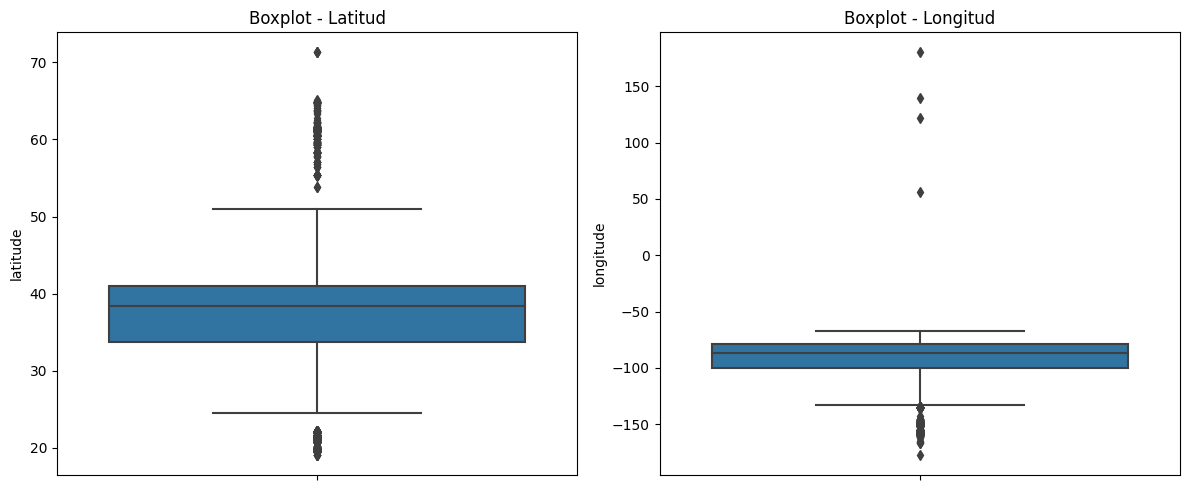

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='latitude', data=df_sitios, ax=axes[0])
axes[0].set_title('Boxplot - Latitud')
sns.boxplot(y='longitude', data=df_sitios, ax=axes[1])
axes[1].set_title('Boxplot - Longitud')

plt.tight_layout()
plt.show()

In [53]:
# LATITUDE

# Calcular el rango intercuartílico (IQR)
Q1 = df_sitios['latitude'].quantile(0.25)
Q3 = df_sitios['latitude'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior_lat = Q1 - 1.5 * IQR
limite_superior_lat = Q3 + 1.5 * IQR

# Identificar filas con outliers
outliers = df_sitios[(df_sitios['latitude'] < limite_inferior_lat) | (df_sitios['latitude'] > limite_superior_lat)]

In [54]:
# LONGITUDE

# Calcular el rango intercuartílico (IQR)
Q1 = df_sitios['longitude'].quantile(0.25)
Q3 = df_sitios['longitude'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior_long = Q1 - 1.5 * IQR
limite_superior_long = Q3 + 1.5 * IQR

# Identificar filas con outliers
outliers = df_sitios[(df_sitios['longitude'] < limite_inferior_long) | (df_sitios['longitude'] > limite_superior_long)]

<ipython-input-51-a84b2a3fd0ff>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


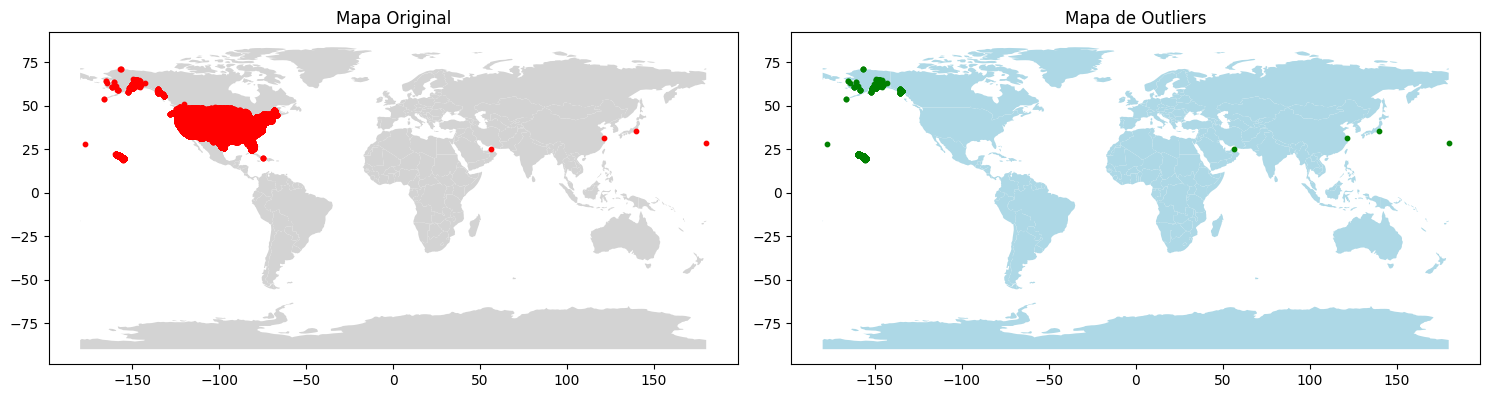

In [51]:
import geopandas as gpd
from shapely.geometry import Point

# Crear geometrías Point para el DataFrame original
geometry_df = [Point(xy) for xy in zip(df_sitios['longitude'], df_sitios['latitude'])]
gdf_df = gpd.GeoDataFrame(df_sitios, geometry=geometry_df)

# Crear geometrías Point para el DataFrame de outliers
geometry_outliers = [Point(xy) for xy in zip(outliers['longitude'], outliers['latitude'])]
gdf_outliers = gpd.GeoDataFrame(outliers, geometry=geometry_outliers)

# Crear mapas base mundiales
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Configurar el diseño de los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Subgráfico 1: Mapa para el DataFrame original
world.plot(ax=axs[0], color='lightgray')
gdf_df.plot(ax=axs[0], color='red', markersize=10)
axs[0].set_title('Mapa Original')

# Subgráfico 2: Mapa para el DataFrame de outliers
world.plot(ax=axs[1], color='lightblue')
gdf_outliers.plot(ax=axs[1], color='green', markersize=10)
axs[1].set_title('Mapa de Outliers')

# Configuraciones adicionales del diseño
#plt.suptitle('Comparación de Outliers', fontsize=16)
plt.tight_layout()
plt.show()

In [52]:

print(f"La cantidad de outliers es de:{outliers['gmap_id'].nunique()}, estos outliers representan el {round(outliers['gmap_id'].nunique() * 100 / df_sitios['gmap_id'].nunique(), 2)}% de los datos")
print('Estos outliers como se puede apreciar en el mapa, se encuentran fuera de USA, por lo poco que representan al dataset, serán eliminados')


La cantidad de outliers es de:1994, estos outliers representan el 0.95% de los datos
Estos outliers como se puede apreciar en el mapa, se encuentran fuera de USA, por lo poco que representan al dataset, serán eliminados


In [61]:
df_sitios = df_sitios[
    (df_sitios['latitude'] >= limite_inferior_lat) & (df_sitios['latitude'] <= limite_superior_lat) &
    (df_sitios['longitude'] >= limite_inferior_long) & (df_sitios['longitude'] <= limite_superior_long)
]

Avg Rating

<Axes: xlabel='avg_rating'>

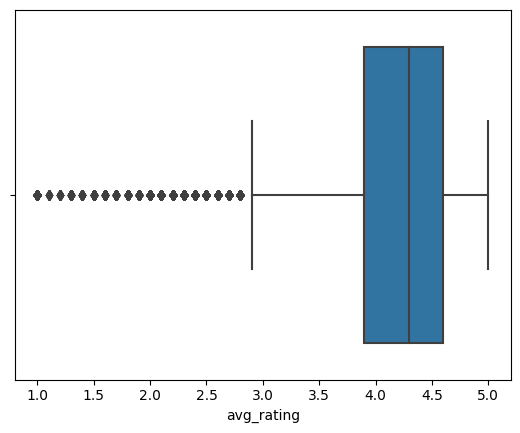

In [79]:
# AVG RATING
sns.boxplot(x = 'avg_rating', data = df_sitios)


Revisando la variable de rating promedio, observamos que aparentemente hay outliers, sin embargo no lo son, simplemente se indica que la mayor cantidad de reviews está entre 3.8 y 4.6, y lo que está fuera se encuentra entre 1 y 5 que son las calificaciones que se pueden dar y no se consideran outliers

### Análisis de datos categóricos

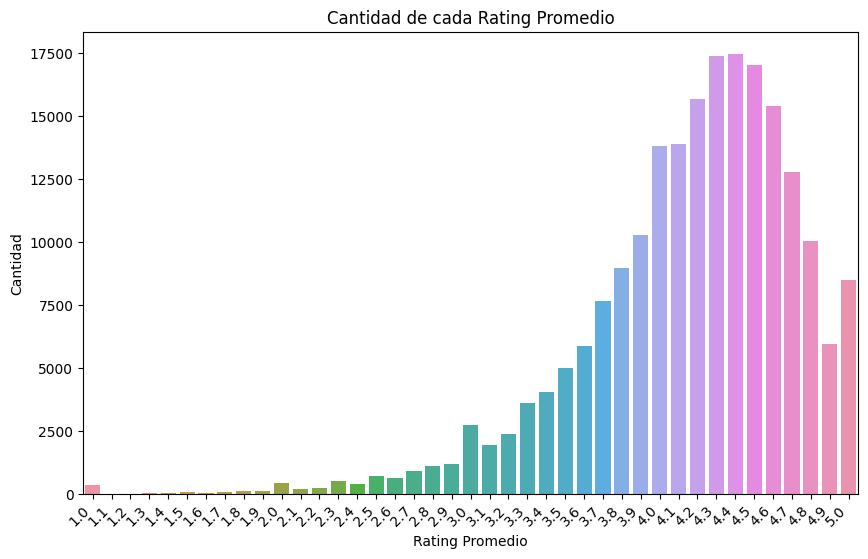

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='avg_rating', data=df_sitios)

plt.xlabel('Rating Promedio')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada Rating Promedio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Top 20 de mejores comentados en Google Maps

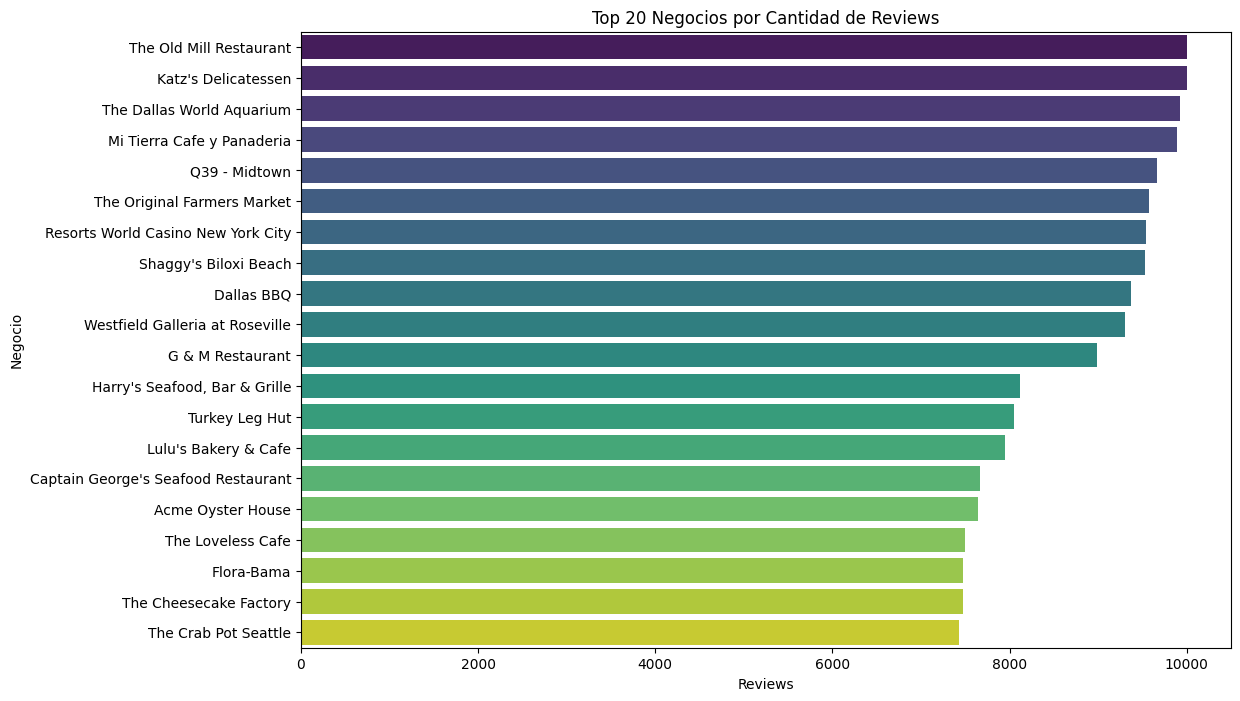

In [88]:
df_top20 = df_sitios.sort_values(by='num_of_reviews', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='num_of_reviews', y='name', data=df_top20, palette='viridis')

plt.xlabel('Reviews')
plt.ylabel('Negocio')
plt.title('Top 20 Negocios por Cantidad de Reviews')

plt.show()

## Análisis preliminar Arizona

### Importamos los datos de BigQuery

In [90]:
from google.colab import auth
auth.authenticate_user()

# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Arizona-1'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_arizona1 = client.query(sql_query).to_dataframe()

In [91]:
df_arizona1.head()

,gmap_id,rating,text,resp,time,pics,name,user_id
0,0x872b0492c48b5799:0x3942026bf7f3a542,1,I knew there was a reason I stopped coming to ...,"{'text': 'Hi Shanna, thank you for letting us ...",1594006698841,[],Shanna Renken,1.025050e+20
1,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Our pool has turned green for the second time ...,{'text': 'We are very sorry that you were not ...,1468527342288,[],denise earles,1.024336e+20
2,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Our pool has turned green for the second time ...,{'text': 'We are very sorry that you were not ...,1468527342288,[],denise earles,1.024336e+20
3,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,"Horrible service, my pool is green they lied w...",{'text': 'We do not have an account listed und...,1437329170678,[],Alyssa Cazares,1.096032e+20
4,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Drivers look more at their phones than the roa...,"{'text': 'Hello, my name is Matt, owner of Spl...",1631041742918,[],Teresa Benson,1.150655e+20


### Valores nulos y tipos de datos

In [93]:
PorcentajeNulos(df_arizona1)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,33.97,50958,99042,150000
resp,object,78.40,117597,32403,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


Hay un 34% de nulos en la columna de texto, pero al ser reseñas de los usuarios no podemos eliminarla.  Lo que si podemos eliminar es la columna 'pics' ya que son fotografías y no nos aportan nada al análisis, al igual que la columna 'resp'

In [96]:
df_arizona1.drop(columns=['pics', 'resp'],inplace=True)
df_arizona1['time']=pd.to_datetime(df_arizona1['time'], unit='ms')

### Valores duplicados

In [102]:
duplicados = df_arizona1[df_arizona1.duplicated(keep=False)]
print(f'Aparentemente hay {len(duplicados)} datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos ')
duplicados.head()

Aparentemente hay 5686 datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos 


,gmap_id,rating,text,time,name,user_id
0,0x872b0492c48b5799:0x3942026bf7f3a542,1,I knew there was a reason I stopped coming to ...,2020-07-06 03:38:18.841,Shanna Renken,1.025050e+20
1,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Our pool has turned green for the second time ...,2016-07-14 20:15:42.288,denise earles,1.024336e+20
2,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Our pool has turned green for the second time ...,2016-07-14 20:15:42.288,denise earles,1.024336e+20
3,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,"Horrible service, my pool is green they lied w...",2015-07-19 18:06:10.678,Alyssa Cazares,1.096032e+20
4,0x86d67aa23bf64c6f:0xd3ecac2cee74ad66,1,Drivers look more at their phones than the roa...,2021-09-07 19:09:02.918,Teresa Benson,1.150655e+20


### df Arizona 2

Proseguimos de igual manera con otro dataset de Arizona, para revisar si es la misma estructura

In [94]:
from google.colab import auth
auth.authenticate_user()

# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Arizona-10'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_arizona10 = client.query(sql_query).to_dataframe()

### Valores nulos y tipos de datos

In [95]:
PorcentajeNulos(df_arizona10)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,40.23,60347,89653,150000
resp,object,82.91,124366,25634,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


Eliminamos igualmente las columnas pics y resp, y modificamos la columna time a tiempo

In [98]:
df_arizona10.drop(columns=['pics', 'resp'],inplace=True)
df_arizona10['time']=pd.to_datetime(df_arizona10['time'], unit='ms')

### Valores duplicados

In [104]:
duplicados = df_arizona10[df_arizona10.duplicated(keep=False)]
print(f'En este data set hay  {len(duplicados)} datos duplicados')
duplicados.head()

En este data set hay  0 datos duplicados


,gmap_id,rating,text,time,name,user_id


Con esto corroboramos que todos los JSON contenidos dentro de la carpeta Arizona, son iguales.

## Análisis preliminar Florida

### Importamos los datos de BigQuery

In [105]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Florida-1'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_florida1 = client.query(sql_query).to_dataframe()

### Valores nulos y tipos de datos

In [106]:
PorcentajeNulos(df_florida1)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,33.32,49977,100023,150000
resp,object,78.69,118033,31967,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


Procedemos igual que en Arizona

In [108]:
df_florida1.drop(columns=['pics', 'resp'],inplace=True)
df_florida1['time']=pd.to_datetime(df_florida1['time'], unit='ms')

### Valores duplicados

In [109]:
duplicados = df_florida1[df_florida1.duplicated(keep=False)]
print(f'Aparentemente hay {len(duplicados)} datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos ')
duplicados.head()

Aparentemente hay 21018 datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos 


,gmap_id,rating,text,time,name,user_id
0,0x8893863ea87bd5dd:0x9383ebf973e74abb,1,Update: Their “reply” to my review amounted to...,2021-08-03 15:07:30.740,Julie A. Gerber,1.014719e+20
1,0x88c33fb303dc8e69:0x3485e731f1a704f8,1,Had a customer walk-in cooler go down in Cape ...,2021-07-07 16:29:40.698,Corey Mullis,1.002893e+20
2,0x88909517e0c1c69b:0xeaa131bf8f6f1251,1,I called on Monday to schedule an appointment....,2020-06-06 15:31:29.132,robo angel,1.026402e+20
3,0x88d9b8bb34fd0f51:0x9acdea75d7add2f6,1,Garbage. They make everything extremely diffic...,2019-08-05 18:11:50.908,billy martinez,1.080274e+20
4,0x88c28c35f39c1f23:0x5fe822ee1f57185f,1,First of all there is no clubhouse no pool not...,2021-03-06 02:45:03.576,Mason Storm,1.135203e+20


## Análisis preliminar Indiana

### Importamos los datos de BigQuery

In [116]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Indiana-10'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_indiana10 = client.query(sql_query).to_dataframe()

In [117]:
df_indiana10.head(3)

,gmap_id,rating,text,resp,time,pics,name,user_id
0,0x88111206815efb61:0x4c36eafe3a41f49c,1,None,"{'text': 'Eddie, we would sure like to know wh...",1618797610222,[],Eddie Dewes,1.064666e+20
1,0x886c8fbacef7af27:0x850b822e45aa9390,1,Placed an order on line followed all the steps...,{'text': 'I'm so sorry this happened. Our emp...,1596750584587,[],Rodney Chandler,1.026424e+20
2,0x8814ad8c33edce45:0x6c92cb9f28d4b795,1,I ordered pickup. I parked in front of their s...,"{'text': 'Hi there Clifton, We are very sorry...",1612059637680,[],Clifton Mulanax,1.155870e+20


### Valores nulos y tipos de datos

In [118]:
PorcentajeNulos(df_indiana10)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,44.90,67346,82654,150000
resp,object,85.53,128299,21701,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


In [119]:
df_indiana10.drop(columns=['pics', 'resp'],inplace=True)
df_indiana10['time']=pd.to_datetime(df_indiana10['time'], unit='ms')

### Valores duplicados

In [121]:
duplicados = df_indiana10[df_indiana10.duplicated(keep=False)]
print(f'En este data set hay  {len(duplicados)} datos duplicados')
duplicados.head()

En este data set hay  0 datos duplicados


,gmap_id,rating,text,time,name,user_id


## Análisis preliminar Louisiana

### Importamos los datos de BigQuery

In [122]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Lousiana-5'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_louisiana5 = client.query(sql_query).to_dataframe()

In [123]:
df_louisiana5.head(3)

,gmap_id,rating,text,resp,time,pics,name,user_id
0,0x8620a5560367d015:0x285da0e701b03236,1,"Ugly, impractical furniture for old rich people",{'text': 'Thank you for your recent response -...,1560023163035,[],Nathan Killeen,1.119237e+20
1,0x8620a5560367d015:0x285da0e701b03236,1,None,{'text': 'Thanks so much for your recent revie...,1560210925609,[],Zipora Hall,1.088139e+20
2,0x889de410050242ed:0xe52f609eeec6ef7d,1,Dirty hard water and leaves suds all over your...,"{'text': 'Thank you for washing with us, Jonat...",1618673248788,[{'url': ['https://lh5.googleusercontent.com/p...,Jonathan Holden,1.148018e+20


### Valores nulos y tipos de dato

In [124]:
PorcentajeNulos(df_louisiana5)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,48.36,72543,77457,150000
resp,object,88.79,133181,16819,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


In [125]:
df_louisiana5.drop(columns=['pics', 'resp'],inplace=True)
df_louisiana5['time']=pd.to_datetime(df_louisiana5['time'], unit='ms')

### Valores duplicados

In [126]:
duplicados = df_louisiana5[df_louisiana5.duplicated(keep=False)]
print(f'En este data set hay  {len(duplicados)} datos duplicados')
duplicados.head()

En este data set hay  0 datos duplicados


,gmap_id,rating,text,time,name,user_id


## Análisis preliminar Missouri

### Importamos los datos de BigQuery

In [127]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'Missouri-11'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_missouri11 = client.query(sql_query).to_dataframe()

In [131]:
df_missouri11.head()

,gmap_id,rating,text,time,name,user_id
0,0x87c11a36d108c45d:0x7c98189f49558104,1,None,2019-10-14 12:58:47.320,ash PoPyOuRrOxX,1.027543e+20
1,0x87ded645523c2977:0x2f390d1ca8a20aa4,1,None,2020-05-23 23:34:43.488,Perry Webb,1.090617e+20
2,0x87ded645523c2977:0x2f390d1ca8a20aa4,1,None,2019-05-01 01:40:34.955,Kristi Ponder,1.164567e+20
3,0x87df2933919bd71b:0xef08583efba2853a,1,No receipt paper in the pump. I had to go insi...,2019-04-29 23:23:21.364,Michael Dawson,1.183553e+20
4,0x87cf038267f681d5:0x7da7139a1286b954,1,"Maybe a good at what they do; however, during ...",2017-05-04 16:34:54.058,Kris Mann,1.103451e+20


### Valores nulos y tipos de datos

In [128]:
PorcentajeNulos(df_missouri11)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,43.71,65570,84430,150000
resp,object,86.90,130351,19649,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


In [129]:
df_missouri11.drop(columns=['pics', 'resp'],inplace=True)
df_missouri11['time']=pd.to_datetime(df_missouri11['time'], unit='ms')

### Valores duplicados

In [130]:
duplicados = df_missouri11[df_missouri11.duplicated(keep=False)]
print(f'En este data set hay  {len(duplicados)} datos duplicados')
duplicados.head()

En este data set hay  0 datos duplicados


,gmap_id,rating,text,time,name,user_id


## Análisis preliminar Pennsylvania

### Importamos los datos de BigQuery

In [133]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'pennsylvania-13'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_penn13 = client.query(sql_query).to_dataframe()

In [134]:
df_penn13.head(3)

,gmap_id,rating,text,resp,time,pics,name,user_id
0,0x89c4dfbc2729c651:0xd85133563033ed53,1,"Placed an order on the phone for flower, and e...",{'text': 'Hello Steven - Thank you for reachin...,1616695197824,[],Steven Miick,1.037391e+20
1,0x89cb11480114b607:0xbb7a2bd06e0592d,1,I was there twice for the lunch buffet. It was...,"{'text': 'Hi Kayla Burkett , thanks for lettin...",1592327762225,[],Kayla Burkett,1.138883e+20
2,0x89cb11480114b607:0xbb7a2bd06e0592d,1,Frozen chicken taste freezer burn,{'text': 'We do our best to deliver great food...,1598833395122,[],Mary Terranova,1.025884e+20


### Valores nulos y tipo de datos

In [135]:
PorcentajeNulos(df_penn13)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,43.95,65927,84073,150000
resp,object,88.59,132888,17112,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


In [136]:
df_penn13.drop(columns=['pics', 'resp'],inplace=True)
df_penn13['time']=pd.to_datetime(df_penn13['time'], unit='ms')

### Valores duplicados

In [137]:
duplicados = df_penn13[df_penn13.duplicated(keep=False)]
print(f'En este data set hay  {len(duplicados)} datos duplicados')
duplicados.head()

En este data set hay  0 datos duplicados


,gmap_id,rating,text,time,name,user_id


## Análisis preliminar Tennessee

### Importamos los datos de BigQuery

In [138]:
# Reemplaza 'project_id' con tu ID de proyecto de BigQuery
project_id = 'my-project-89113-test'

from google.cloud import bigquery

# Configura el cliente de BigQuery
client = bigquery.Client(project=project_id)

# Reemplaza 'dataset_name' y 'table_name' con el nombre real del conjunto de datos y la tabla
dataset_name = 'dataset_yelp'
table_name = 'tennessee-8'

# Construye la consulta SQL
sql_query = f'''
SELECT *
FROM `{project_id}.{dataset_name}.{table_name}`
'''

# Ejecuta la consulta y convierte los resultados en un DataFrame de Pandas
df_tenn8 = client.query(sql_query).to_dataframe()

In [139]:
df_tenn8.head(3)

,gmap_id,rating,text,resp,time,pics,name,user_id
0,0x88672223da4dac1d:0xd95f90a28915725e,1,None,"{'text': 'Tanya, Please let us know what we ca...",1536420768259,[],tanya crawford,1.081221e+20
1,0x88672e637ba57e1d:0xf61192fb49e5b44d,1,The owner is very rude. This place takes advan...,"{'text': 'Victoria, we are unable to find any ...",1519577330901,[],Victoria Hall,1.105796e+20
2,0x88672e637ba57e1d:0xf61192fb49e5b44d,1,Okay this was not a shop I'll go to again .\nI...,{'text': 'I'm sorry to hear about your experie...,1519818888930,[],Chrystel Morris,1.013551e+20


### Valores nulos y tipos de datos

In [140]:
PorcentajeNulos(df_tenn8)

,Data_Types,%_Null,Qty_Null,Qty_No_Null,Total_Registros
gmap_id,object,0.00,0,150000,150000
rating,Int64,0.00,0,150000,150000
text,object,43.83,65746,84254,150000
resp,object,85.64,128456,21544,150000
time,Int64,0.00,0,150000,150000
pics,object,0.00,0,150000,150000
name,object,0.00,0,150000,150000
user_id,float64,0.00,0,150000,150000


In [141]:
df_tenn8.drop(columns=['pics', 'resp'],inplace=True)
df_tenn8['time']=pd.to_datetime(df_tenn8['time'], unit='ms')

### Valores duplicados

In [143]:
duplicados = df_tenn8[df_tenn8.duplicated(keep=False)]
print(f'Aparentemente hay {len(duplicados)} datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos ')
duplicados.head()

Aparentemente hay 160 datos duplicados, sin embargo al revisarlo vemos que no son realmente datos duplicados por lo que no los eliminaremos 


,gmap_id,rating,text,time,name,user_id
106792,0x885af2068747cbad:0x5c82f79baf6ccd7f,5,Nice clean fast and some little what friendly,2019-11-26 08:42:58.781,coffelt25 productions,1.183970e+20
106793,0x885af2068747cbad:0x5c82f79baf6ccd7f,5,Things went great. I got the wrong part and th...,2019-08-10 18:39:54.526,joel Shupe,1.055397e+20
106794,0x885af2068747cbad:0x5c82f79baf6ccd7f,5,Love the service and friendly staff. Highly re...,2019-06-26 20:36:59.794,Josh Phillips,1.043982e+20
106795,0x885af2068747cbad:0x5c82f79baf6ccd7f,5,GREAT PEOPLE AD ALWAYS �� fast service friendl...,2019-03-15 17:50:31.488,froggy frog,1.084974e+20
106796,0x885af2068747cbad:0x5c82f79baf6ccd7f,5,Very friendly team and they were able to assis...,2019-03-16 19:49:44.612,Jayson Williams,1.041395e+20
